<a href="https://colab.research.google.com/github/PatrickJahn/easv-ML-mini-project/blob/main/ML_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Mini Project

The mini project can be a classification or regression task, and it should
include

1.   Loading and preparation of data
2.   Selection, training and fine-tuning of a model
3.   Evaluation of the model

You can choose between the following model architectures:

1.   Multilayer Perceptron
2.   Convolutional Neural Network
3.   Random Forest
4.   Gradient Boosted Decision Trees (incl. Histogram-Based Gradient Boosting)

# Spam Email Classification - Random Forest

## Loading and preparation of data

In [58]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [f'feature_{i}' for i in range(57)] + ['is_spam']
df = pd.read_csv(url, names=column_names)

# Preprocess the data
# Split the data into features and target
X = df.drop('is_spam', axis=1)
y = df['is_spam']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ModuleNotFoundError: No module named 'sklearn'

## Training and fine-tuning of a model

In [59]:
# Import the Random Forest Model and model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)


# Define a grid of hyperparameters to test
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model for predictions
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(X_test)


ModuleNotFoundError: No module named 'sklearn'

## Evaluation of the model

In [ ]:
# Import necessary modules for evaluation
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
predictions = random_forest.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Evaluate the best model with fine tuning
print("Accuracy after fine-tuning:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9565532223026793
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       804
           1       0.97      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381

Accuracy after fine-tuning: 0.9565532223026793
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       804
           1       0.97      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381



# Income Level Prediction - MLPP


## Import

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

## Loading and preparation of Data


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]

# Load the data
data = pd.read_csv(url, names=column_names, na_values=' ?', sep=',\s', engine='python')

# Split the data into features and target label
X = data.drop('income', axis=1)
y = data['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Convert income to binary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define categorical and numerical features for preprocessing
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Create preprocessors for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Training and fine-tuning of a model

In [126]:
# Create an MLP model pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42))
])

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42, stratify=y_train)

param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,)],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__alpha': [0.0001, 0.001]
}

grid_search = GridSearchCV(mlp_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# Fine-tuning the MLP model
grid_search.fit(X_train_small, y_train_small)

# Print out the best parameters
print("Best parameters found: ", grid_search.best_params_)

## Evaluation of the model

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Age Classification from images - CNN

## Loading and preparation of data

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg



In [89]:
# Setup the path to the images and the attributes
PATH_TO_ATTR = 'Datasets/other/faces/train.csv'
PATH_TO_IMGS = 'Datasets/other/faces/Train'


# Then we check if there are the same amount of attributes and images
data = pd.read_csv(PATH_TO_ATTR)
images = os.listdir(PATH_TO_IMGS)

print(data.shape[0])
print(len(images))

19906
19906


In [90]:
# Read the csv file to check out the attributes
data.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [91]:
data.describe()

,ID,Class
count,19906,19906
unique,19906,3
top,377.jpg,MIDDLE
freq,1,10804


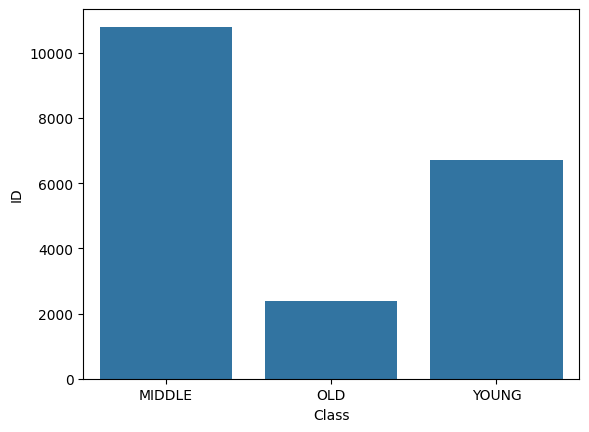

In [ ]:
# Check how many of each attribute class their is 
groupedvalues = data.groupby('Class').count()
g = sns.barplot(x='Class', y='ID', data=groupedvalues)

In [ ]:
# Replace the 3 Class values with a numeric value 
data['Class'].replace(['YOUNG','MIDDLE','OLD'],[0,1,2],inplace=True)

# We want to make sure that the order of image classes is random
data.sample(frac=1)

data.head()

,ID,Class
0,377.jpg,1
1,17814.jpg,0
2,21283.jpg,1
3,16496.jpg,0
4,4487.jpg,1


In [106]:
# Function to read the image an reformat it so all images are the same size and type
def readAndFormatImage(path):
      img = tf.io.read_file(path)
      img = tf.image.decode_jpeg(img, channels=3)
      img = tf.image.convert_image_dtype(img, dtype=tf.float32)
      img = tf.image.resize(img, (150, 150))
      return img

In [107]:
def load_data(image_path, label):
    img = readAndFormatImage(image_path)
    return (img, label)

In [108]:
# built the list of image paths and list of respective responses of the images
image_paths = []
for path in os.listdir(PATH_TO_IMGS):
    image_paths.append(PATH_TO_IMGS+"/"+path)
print(len(image_paths))

response_list = []

for i in image_paths:
    _,tail = os.path.split(i)
    data.loc
    response = data.loc[data['ID'] == tail]['Class'].values[0]
    response_list.append(response)
print(len(response_list))

19906
19906


In [117]:
# split the dataset into train and test dataset
train_size = int(0.1*(len(image_paths)))
print(train_size)
test_size = int(0.1*(len(image_paths)))

train_set = tf.data.Dataset.from_tensor_slices((image_paths[:train_size], response_list[:train_size]))
test_set = tf.data.Dataset.from_tensor_slices((image_paths[test_size:], response_list[test_size:]))

1990


In [118]:
train_set = (train_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

test_set = (test_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

## Training and fine-tuning of a model

In [119]:
# build the layers of CNN model
from tensorflow.keras import layers,models

cnn_model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(150, 150, 3), padding = 'same'),
    layers.MaxPooling2D(pool_size=2),


    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding = 'same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding = 'same'),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding = 'same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding = 'same'),
    layers.MaxPooling2D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [120]:
cnn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,734,346 (44.76 MB)

 Trainable params: 11,734,346 (44.76 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
# train the model
cnn_model.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10


KeyboardInterrupt: 

## Evaluation of the model

In [ ]:
# test accuracy
cnn_model.evaluate(test_set)

26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 692ms/step - accuracy: 0.1033 - loss: 1.6485


[1.6900498867034912, 0.2222222238779068]

In [ ]:
test_pred = cnn_model.predict(test_set)

26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 650ms/step


In [ ]:
y_labels = [np.argmax(item) for item in test_pred]
print("Test Predictions response sample:",y_labels[:10])

test_response = response_list[test_size:]
print("Test True response sample:", test_response[:10])


Test Predictions response sample: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
